## **Latihan Agglomerative Clustering  & DBScan**

Dataset: "Mall_Customers.csv"

- Lakukan EDA untuk memahami dataset.
- Jelaskan mengenai insight yang didapat dari EDA!
<br><br>
- Untuk clustering, drop saja feature 'CustomerID' dan 'Gender'. Dari 3 feature terisisa, pilih kombinasi 2 feature terbaik yang selanjutnya akan digunakan untuk clustering.
- Lakukan scaling menggunakan StandardScaler, lalu gunakan metode K-Means, Agglomerative clustering, dan DBScan. Cari jumlah cluster paling optimal untuk tiap metode.
<br><br>
- Bandingkan hasil dari ketiga metode yang sudah dicoba, manakah metode yang terbaik? 
- Interpretasikan hasil clustering-nya!

## **Import libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

import warnings
warnings.filterwarnings('ignore')

## **Load & explore dataset**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename columns
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score',
        'Annual Income (k$)': 'Annual Income'})

In [4]:
# Drop customerID column
df.drop('CustomerID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

## **EDA**

In [8]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

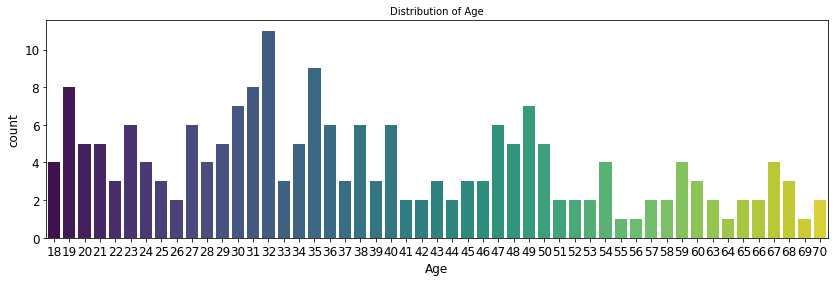

In [9]:
plt.figure(figsize=(14, 4))
sns.countplot(df['Age'], palette = 'viridis')
plt.title('Distribution of Age');

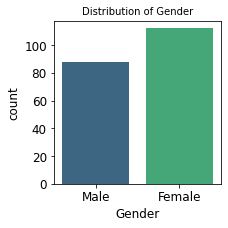

In [10]:
plt.figure(figsize=(3, 3))
sns.countplot(df['Gender'], palette = 'viridis')
plt.title('Distribution of Gender');

In [11]:
df['Gender'].value_counts()/df.shape[0]*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

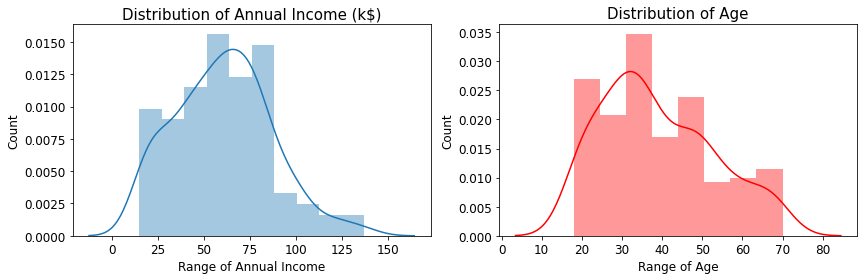

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.tight_layout();

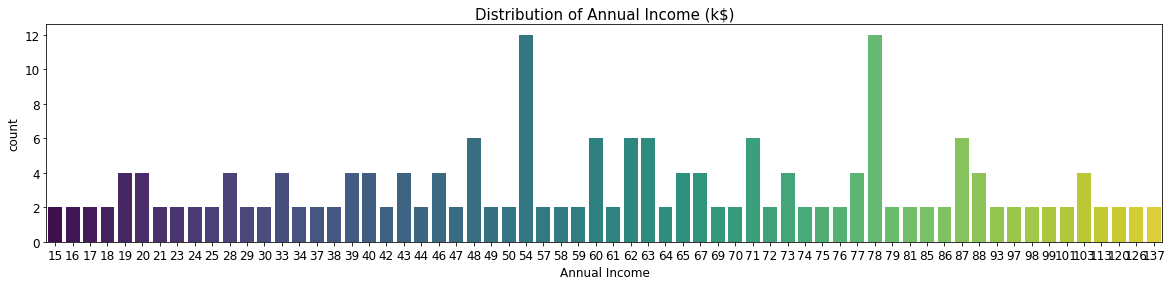

In [13]:
plt.figure(figsize=(20, 4))
sns.countplot(x='Annual Income', data=df, palette='viridis')
plt.title('Distribution of Annual Income (k$)', fontsize = 15);

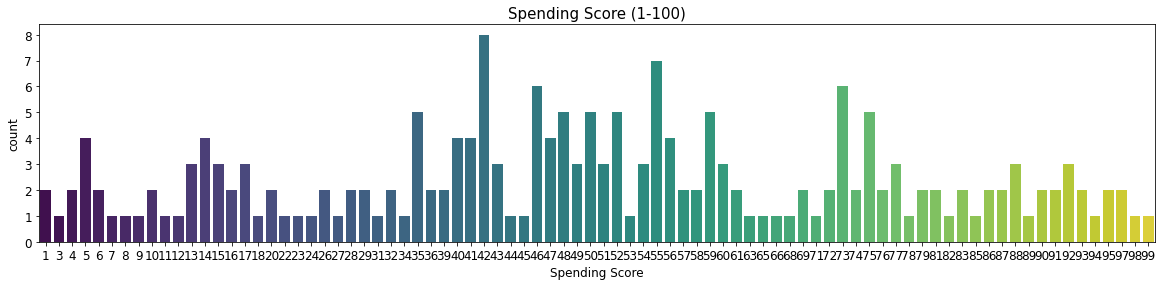

In [14]:
plt.figure(figsize=(20, 4))
sns.countplot(x='Spending Score', data=df, palette='viridis')
plt.title('Spending Score (1-100)', fontsize = 15);

### **Age vs Annual Income**

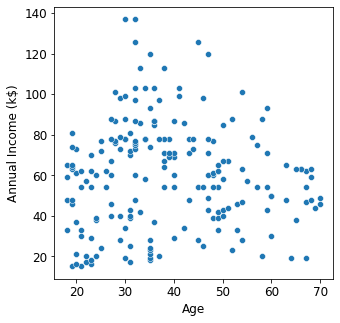

In [15]:
plt.figure(figsize = (5, 5))
# sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Annual Income', 
    data = df)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)');

### **Age vs Spending Score**

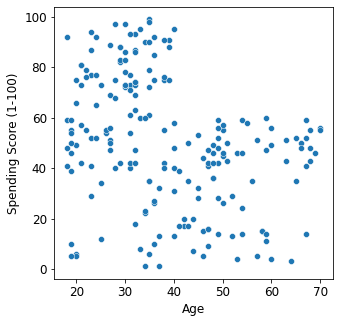

In [16]:
plt.figure(figsize = (5, 5))
# sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Spending Score', 
    data = df)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

### **Annual Income vs Spending Score**

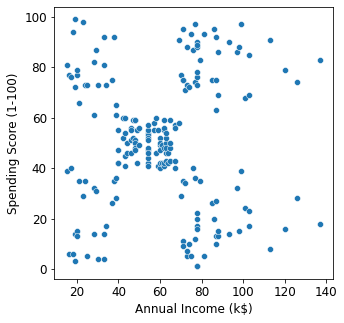

In [17]:
plt.figure(figsize = (5, 5))
# sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Annual Income', 
    y = 'Spending Score', 
    data = df)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

In [18]:
import plotly.express as px
import plotly.graph_objects as go

In [19]:
fig = px.scatter_3d(
    df, 
    x= 'Annual Income', 
    y= 'Spending Score', 
    z= 'Age',
    # color= df['labels'].astype(str),
    # color_discrete_sequence= ["red", "blue", "green"]
)

fig.update_traces(marker_size = 2)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    # margin=dict(
    #     l=50,
    #     r=50,
    #     b=100,
    #     t=100,
    #     pad=4
    # ),
    paper_bgcolor="white",
)

fig.show()

## **Clustering**

Untuk tujuan clustering dengan metode yang akan digunakan, feature 'Gender' akan didrop karena merupakan categorical feature.

In [20]:
df = df.drop(columns='Gender', axis=1)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **Finding the best features combination**
Kita akan mencoba memilih 2 features untuk clustering, dengan tujuan mempermudah visualisasi.

## **Scaling**

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [22]:
# mencari kombinasi feature terbaik dengan KMeans (n_clusters=3)

import itertools

silhouette = []
score = 0
thislist = ['Age', 'Annual Income', 'Spending Score']

for i in itertools.combinations(thislist, 2):

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(df_scaled[list(i)])
    labels = kmeans.labels_
    sil = silhouette_score(df_scaled[list(i)], labels, metric = 'euclidean')
    silhouette.append(sil)

    if score < sil:
        best_combination = i
        score = sil

    print(sil, i)

print()
print('best features combinantion is', best_combination, 'with silhouette score:', score)

0.4437863926928188 ('Age', 'Annual Income')
0.4395299000230284 ('Age', 'Spending Score')
0.46658474419000145 ('Annual Income', 'Spending Score')

best features combinantion is ('Annual Income', 'Spending Score') with silhouette score: 0.46658474419000145


In [23]:
# mencari kombinasi feature terbaik dengan KMeans
X1 = df_scaled[['Age', 'Annual Income']]
X2 = df_scaled[['Age', 'Spending Score']]
X3 = df_scaled[['Annual Income', 'Spending Score']]

cluster_list = [X1, X2, X3]

for i in cluster_list:
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(i)
    labels = kmeans.labels_
    print('Silhoutte score:', silhouette_score(i, labels),'\t', i.columns)
    kmeans.labels_ = 'cluster', i

Silhoutte score: 0.4431419612216489 	 Index(['Age', 'Annual Income'], dtype='object')
Silhoutte score: 0.4395299000230284 	 Index(['Age', 'Spending Score'], dtype='object')
Silhoutte score: 0.46658474419000145 	 Index(['Annual Income', 'Spending Score'], dtype='object')


Karena nilai silhouette score antara 'Annual Income' dan 'Spending Score' paling tinggi, untuk mempermudah visualisasi, maka untuk proses clustering selanjutnya hanya akan digunakan 2 feature ini.

In [24]:
X_scaled = df_scaled[['Annual Income', 'Spending Score']]
X_scaled

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


## **K-Means**

### **Elbow method**

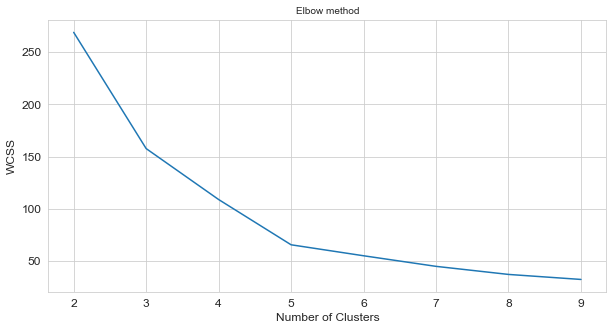

In [25]:
# model 
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X_scaled) for k in range (2, 10)]

# inertia (WCSS)
inertia = [model.inertia_ for model in kmeans_models]

sns.set_style(style='whitegrid')
plt.figure(figsize=(10, 5))

plt.plot(range(2, 10), inertia)

plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

### **Silhouette Score**

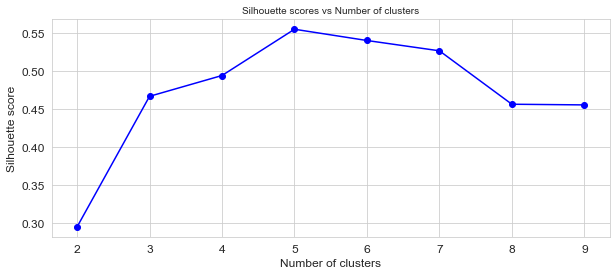

In [26]:
# Silhouette score
silhoutte = [silhouette_score(X_scaled, model.labels_) for model in kmeans_models]

plt.figure(figsize=(10, 4))

plt.plot(range(2, 10), silhoutte, 'bo-')

plt.xticks(list(np.arange(2,10)))
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

### **Interpretasi**

Silhouette score tertinggi didapat dengan jumlah cluster = 5.

In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

KMeans(n_clusters=5)

In [31]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [32]:
df['kmeans'] = kmeans.labels_
df

,Age,Annual Income,Spending Score,kmeans
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


In [33]:
print('Silhouette score K-Means:', silhouette_score(X_scaled, kmeans.labels_))

Silhouette score K-Means: 0.5546571631111091


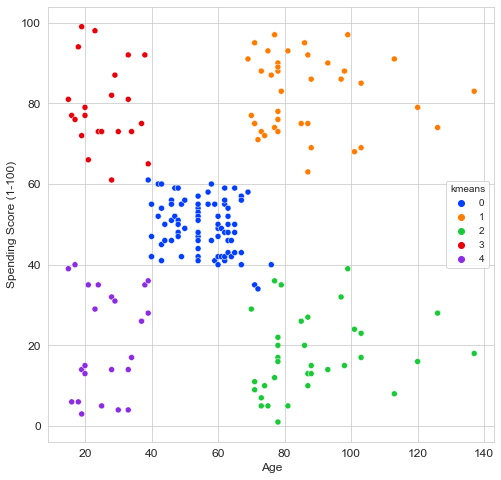

In [34]:
# Plotting the result
plt.figure(figsize = (8, 8) )
# sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Annual Income', 
    y = 'Spending Score', 
    hue = 'kmeans',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Agglomerative clustering**

Objective:
- Data point dalam satu cluster karakternya mirip
- Antar cluster karakternya berbeda

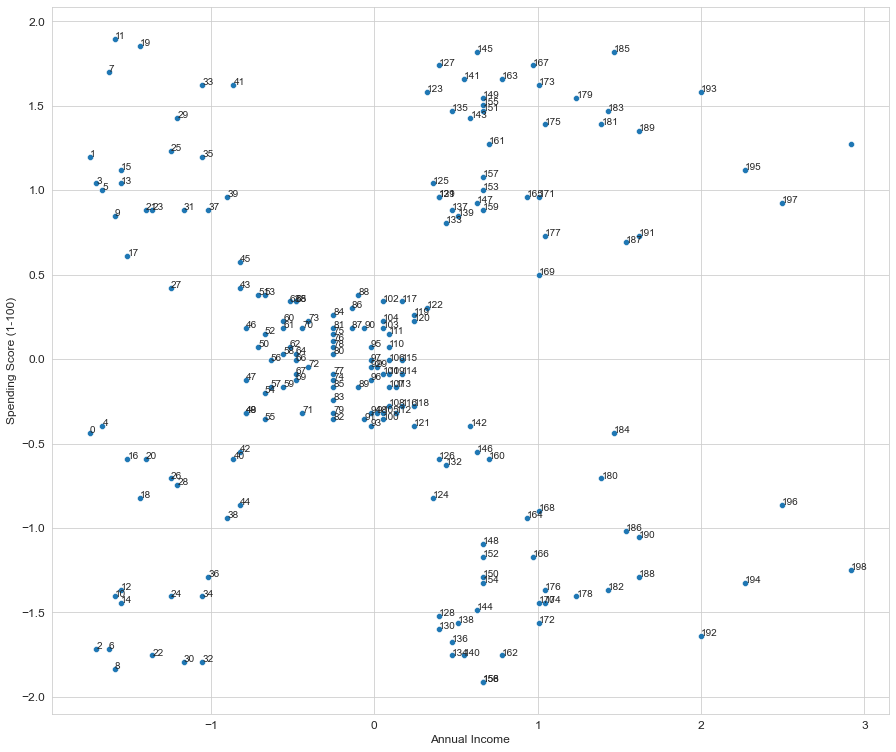

In [35]:
# scatterplot Age vs Spending Score
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Annual Income', y='Spending Score', data=X_scaled)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')

# memberi nomor pada tiap data point
for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt, (X_scaled['Annual Income'][i], X_scaled['Spending Score'][i]), fontsize=10)

### **Ward**
Menggabungkan 2 cluster dengan variance terkecil (paling seragam)

In [36]:
# Hierrchical clustering dengan linkage ward
linkage_ward = ward(X_scaled)
linkage_ward[-10:]

array([[353.        , 382.        ,   2.48747181,  49.        ],
       [372.        , 384.        ,   2.69811041,  30.        ],
       [377.        , 381.        ,   3.15032521,  23.        ],
       [383.        , 389.        ,   4.07254633,  85.        ],
       [388.        , 390.        ,   4.30813529,  39.        ],
       [385.        , 386.        ,   4.35442215,  32.        ],
       [391.        , 392.        ,   9.45335291, 108.        ],
       [387.        , 395.        ,  10.14126314, 129.        ],
       [394.        , 396.        ,  15.18618939, 161.        ],
       [393.        , 397.        ,  15.62483742, 200.        ]])

''

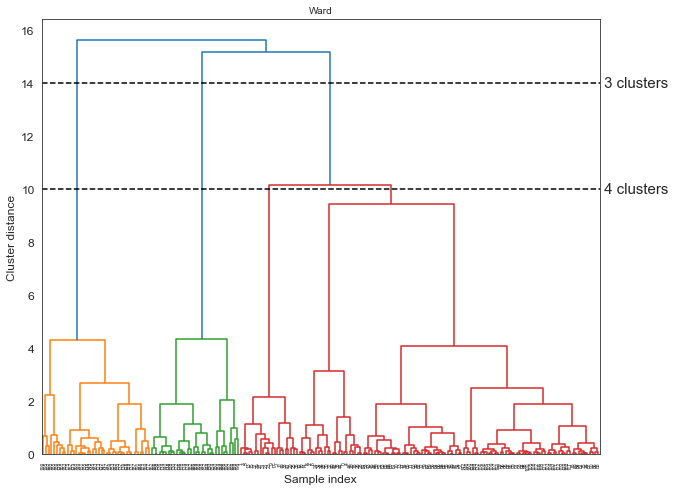

In [37]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_ward, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [14, 14], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')
ax.text(bounds[1], 14, ' 3 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 10, ' 4 clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
;

**Perubahan jarak**
- 2 cluster = 0.4
- 3 cluster = 5.0 
- 4 cluster = 0.7
- 5 cluster = 5.1 (3 cluster paling optimal)



### **Complete**
Menghitung jarak antar data point terjauh pada cluster berbeda, lalu menyatukan yg jaraknya paling kecil

\* sensitif terhadap outliers

In [38]:
# Hierrchical clustering dengan linkage complete
linkage_complete = complete(X_scaled)
linkage_complete[-5:]

array([[370.        , 392.        ,   2.61403624,  39.        ],
       [387.        , 390.        ,   2.86378803, 102.        ],
       [389.        , 395.        ,   3.72686983, 123.        ],
       [393.        , 394.        ,   3.90921424,  77.        ],
       [396.        , 397.        ,   5.50147501, 200.        ]])

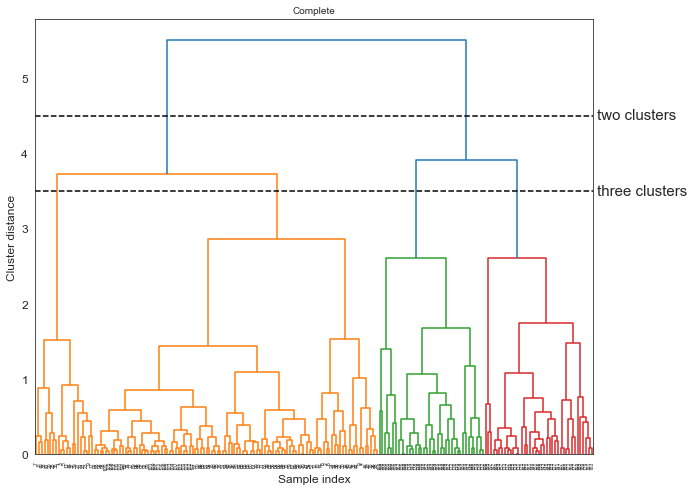

In [39]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_complete, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4.5, 4.5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 4.5, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Perubahan jarak**
- 2 cluster = 1.6 (2 cluster paling optimal)
- 3 cluster = 0.2 
- 4 cluster = 0.9
- 5 cluster = 0.2 


### **Average**
Menghitung jarak antara tiap data point ke data point di cluster lainnya, kemudian dirata-ratakan. Kemudian dicari yg nilainya paling kecil

In [40]:
# Hierrchical clustering dengan linkage average
linkage_average = average(X_scaled)
linkage_average[-8:]

array([[385.        , 387.        ,   1.02172432,  36.        ],
       [377.        , 389.        ,   1.02261282,  34.        ],
       [384.        , 390.        ,   1.64148137, 102.        ],
       [386.        , 392.        ,   1.6659244 ,  38.        ],
       [379.        , 391.        ,   1.76028807,  39.        ],
       [388.        , 393.        ,   1.81715707, 123.        ],
       [394.        , 396.        ,   2.21477378, 161.        ],
       [395.        , 397.        ,   2.31099589, 200.        ]])

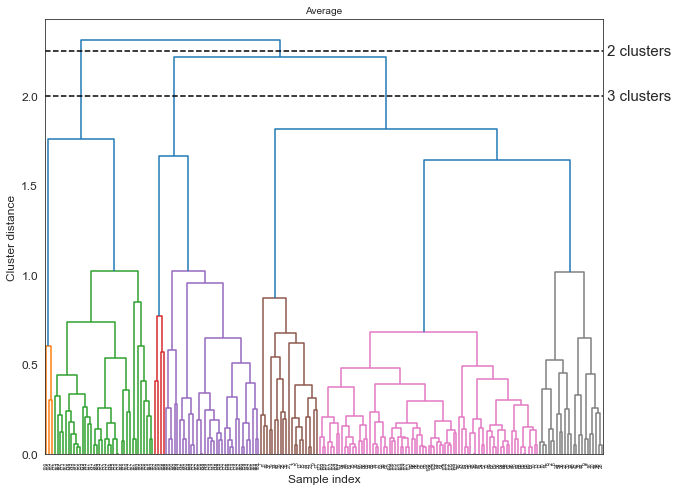

In [41]:
plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_average, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [2.25, 2.25], '--', c='k')
ax.plot(bounds, [2, 2], '--', c='k')
ax.text(bounds[1], 2.25, ' 2 clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 2, ' 3 clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Perubahan jarak**
- 2 cluster = 0.1
- 3 cluster = 0.4 (3 cluster paling optimal)
- 4 cluster = 0.06
- 5 cluster = 0.1

### **Results comparison**

**Pemilihan Jumlah Cluster**

- Pemilihan jumlah cluster pada agglomerative clustering dapat dipilih secara subjective (berdasarkan domain knowledge), atau dengan pendekatan memilih perubahan jarak terbesar. 

- Dari visualisasi dendrogram pada 3 metode di atas, kita mendapatkan kandidat metode dan cluster:
    - Ward: 5 cluster
    - Complete: 2 cluster
    - Average: 3 cluster
    
<br>

- Dari 3 metode linkage yang digunakan dari Hierarchical Clustering pada dataset ini, menunjukkan jumlah cluster terbaik adalah 2 atau 3 cluster. 
- Coba dengan silhouette score, manakah metode dan berapa cluster-kah yang terbaik?

In [42]:
X_scaled

,Annual Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [43]:
# Comparison of 2 clusters

agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Ward2'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df['Complete2'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df['Average2'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2
0,19,15,39,4,0,1,0
1,21,15,81,3,0,1,0
2,20,16,6,4,0,1,0
3,23,16,77,3,0,1,0
4,31,17,40,4,0,1,0


In [44]:
print('Silhouette score ward 2 clusters:', silhouette_score(X_scaled, df['Ward2']))
print('Silhouette score complete 2 clusters:', silhouette_score(X_scaled, df['Complete2']))
print('Silhouette score average 2 clusters:', silhouette_score(X_scaled, df['Average2']))

Silhouette score ward 2 clusters: 0.3842337621772661
Silhouette score complete 2 clusters: 0.36071083057634334
Silhouette score average 2 clusters: 0.3842337621772661


In [45]:
# Comparison of 3 clusters

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Ward3'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['Complete3'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Average3'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3
0,19,15,39,4,0,1,0,0,0,0
1,21,15,81,3,0,1,0,0,0,0
2,20,16,6,4,0,1,0,0,0,0
3,23,16,77,3,0,1,0,0,0,0
4,31,17,40,4,0,1,0,0,0,0


In [46]:
print('Silhouette score ward 3 clusters:', silhouette_score(X_scaled, df['Ward3']))
print('Silhouette score complete 3 clusters:', silhouette_score(X_scaled, df['Complete3']))
print('Silhouette score average 3 clusters:', silhouette_score(X_scaled, df['Average3']))

Silhouette score ward 3 clusters: 0.4610481446570447
Silhouette score complete 3 clusters: 0.46658474419000145
Silhouette score average 3 clusters: 0.46658474419000145


In [47]:
# Comparison of 5 clusters

agg_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Ward5'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
df['Complete5'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=5, linkage='average')
df['Average5'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5
0,19,15,39,4,0,1,0,0,0,0,4,1,1
1,21,15,81,3,0,1,0,0,0,0,3,3,3
2,20,16,6,4,0,1,0,0,0,0,4,1,1
3,23,16,77,3,0,1,0,0,0,0,3,3,3
4,31,17,40,4,0,1,0,0,0,0,4,1,1


In [48]:
print('Silhouette score ward 5 clusters:', silhouette_score(X_scaled, df['Ward5']))
print('Silhouette score complete 5 clusters:', silhouette_score(X_scaled, df['Complete5']))
print('Silhouette score average 5 clusters:', silhouette_score(X_scaled, df['Average5']))

Silhouette score ward 5 clusters: 0.5538089226688662
Silhouette score complete 5 clusters: 0.5531118656926701
Silhouette score average 5 clusters: 0.4794263081846086


In [49]:
pd.DataFrame({'Total Cluster': ['2 Clusters', '3 Clusters', '5 Clusters'],
    'Ward': [silhouette_score(X_scaled, df['Ward2']), silhouette_score(X_scaled, df['Ward3']), silhouette_score(X_scaled, df['Ward5'])],
    'Complete': [silhouette_score(X_scaled, df['Complete2']), silhouette_score(X_scaled, df['Complete3']), silhouette_score(X_scaled, df['Complete5'])],
    'Average': [silhouette_score(X_scaled, df['Average2']), silhouette_score(X_scaled, df['Average3']), silhouette_score(X_scaled, df['Average5'])]
})

,Total Cluster,Ward,Complete,Average
0,2 Clusters,0.384234,0.360711,0.384234
1,3 Clusters,0.461048,0.466585,0.466585
2,5 Clusters,0.553809,0.553112,0.479426


In [50]:
print('Silhouette score Hierarchical Clustering with Average Linkage 3 cluster:', silhouette_score(X_scaled, df['Ward5']))
# pakai 3 cluster karena melihat dari dendogramnya

Silhouette score Hierarchical Clustering with Average Linkage 3 cluster: 0.5538089226688662


### **Interpretasi**

Berdasarkan metode hierarchical/agglomerative clustering, didapat bahwa linkage average dengan jumlah 2 clusters adalah yang paling optimal untuk segmentasi customer pada kasus ini.

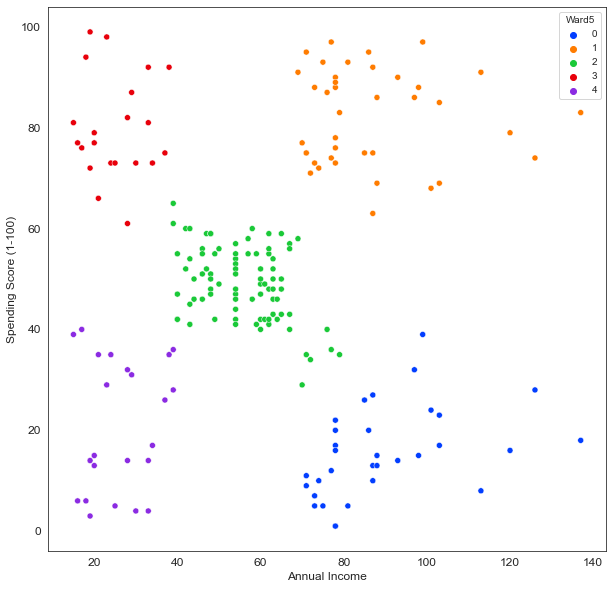

In [51]:
# Plot Average
plt.figure(figsize = (10, 10))
# sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Annual Income', 
    y = 'Spending Score', 
    hue = 'Ward5',
    data = df,
    palette='bright')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)');

## **DBScan**

Pros of DBSCAN
- Tidak perlu menentukan jumlah cluster di awal
- Dapat mengetahui outliers
- Dapat menangkap pola tertentu (tidak beraturan)

Cons of DBSCAN
- Sulit mengidentifikasi cluster pada data yang densitynya terlalu bervariasi
- Kurang baik pada high dimensional data
- Sensitif terhadap epsilon dan min_samples

In [52]:
# plt.figure(figsize=(15, 13))
# sns.scatterplot(x='Annual Income', y='Spending Score', data=X_scaled)

# plt.xlabel('Annual Income')
# plt.ylabel('Spending Score (1-100)')

# for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
#     plt.annotate(txt, (X_scaled['Annual Income'][i], X_scaled['Spending Score'][i]), fontsize=10)

**Optimizing epsilon & min_samples**

In [53]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X_scaled)
labels

array([-1,  1,  0,  1, -1,  1,  0,  3,  0,  1,  2,  3,  2,  1,  2,  1,  4,
       -1, -1,  3,  4,  1,  6,  1,  7,  5,  4, -1,  4,  5,  6,  1,  6, -1,
        7,  5,  7,  1, -1,  1, -1, -1, -1,  8, -1,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  9, -1,  9, -1,  9, 10,  9, 10,  9, -1,  9, 10,  9,
       10,  9, 10,  9, 10,  9, 11,  9, 10,  9, 11,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 11,  9, 10,  9, -1, -1, -1, -1, -1, -1,
       12, -1, 12, -1, 12, -1, 12, -1, 12, -1, -1, -1, 12, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [54]:
list_eps = [0.2, 0.3, 0.4, 0.5]
list_min_samples = [4,5,6,7]

list_sil = []
epsilon = []
min_sam = []
member = []
n_member = []


for eps in list_eps:
    for min_samples in list_min_samples:

        # epsilon
        print('Epsilon', eps)
        epsilon.append(eps)

        # min_samples
        print('min_samples', min_samples)
        min_sam.append(min_samples)

        # fitting and labeling
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        label_dbscan = dbscan.fit_predict(X_scaled)

        # silhoutte score
        list_sil.append(silhouette_score(X_scaled, label_dbscan))
        print('score: ', silhouette_score(X_scaled, label_dbscan))

        # cluster member
        print(np.unique(label_dbscan))
        print(np.bincount(label_dbscan+1))

        member.append(np.unique(label_dbscan))
        n_member.append(np.bincount(label_dbscan+1))

        print()




Epsilon 0.2
min_samples 4
score:  0.19685111632552818
[-1  0  1  2  3  4]
[73  7 79 21 14  6]

Epsilon 0.2
min_samples 5
score:  0.14057942679617555
[-1  0  1  2  3  4  5  6]
[77  6 78 11  9 10  4  5]

Epsilon 0.2
min_samples 6
score:  0.09644483815713828
[-1  0  1  2  3]
[95 78 10  9  8]

Epsilon 0.2
min_samples 7
score:  0.05559332249286136
[-1  0  1  2  3]
[100  78   8   7   7]

Epsilon 0.3
min_samples 4
score:  0.3842796072825817
[-1  0  1  2  3  4  5  6  7]
[23 16  8  7 88 32 14  9  3]

Epsilon 0.3
min_samples 5
score:  0.31614121976731185
[-1  0  1  2  3  4  5  6]
[35 12  5  7 88 30 14  9]

Epsilon 0.3
min_samples 6
score:  0.24983531622925184
[-1  0  1  2  3  4  5]
[48 10  6 87 26 14  9]

Epsilon 0.3
min_samples 7
score:  0.23146493255355374
[-1  0  1  2  3]
[72 10 82 24 12]

Epsilon 0.4
min_samples 4
score:  0.39828449401818633
[-1  0  1  2]
[ 14 126  33  27]

Epsilon 0.4
min_samples 5
score:  0.41325830390002166
[-1  0  1  2  3]
[ 15 115  11  32  27]

Epsilon 0.4
min_samples 6

In [55]:
dbscan_result = pd.DataFrame({
    'epsilon':epsilon,
    'min_samples':min_sam,
    'member': member,
    'n_member': n_member,
    'sil score': list_sil
})

dbscan_result.sort_values('sil score')

,epsilon,min_samples,member,n_member,sil score
3,0.2,7,"[-1, 0, 1, 2, 3]","[100, 78, 8, 7, 7]",0.055593
2,0.2,6,"[-1, 0, 1, 2, 3]","[95, 78, 10, 9, 8]",0.096445
1,0.2,5,"[-1, 0, 1, 2, 3, 4, 5, 6]","[77, 6, 78, 11, 9, 10, 4, 5]",0.140579
0,0.2,4,"[-1, 0, 1, 2, 3, 4]","[73, 7, 79, 21, 14, 6]",0.196851
7,0.3,7,"[-1, 0, 1, 2, 3]","[72, 10, 82, 24, 12]",0.231465
6,0.3,6,"[-1, 0, 1, 2, 3, 4, 5]","[48, 10, 6, 87, 26, 14, 9]",0.249835
5,0.3,5,"[-1, 0, 1, 2, 3, 4, 5, 6]","[35, 12, 5, 7, 88, 30, 14, 9]",0.316141
12,0.5,4,"[-1, 0, 1]","[8, 157, 35]",0.350446
13,0.5,5,"[-1, 0, 1]","[8, 157, 35]",0.350446
15,0.5,7,"[-1, 0, 1]","[12, 154, 34]",0.352615


### **Interpretasi**

Dari berbagai kombinasi epsilon dan min_samples, pilihan terbaik yang dapat dipilih:
- eps = 0.4 & min_samples = 5, silhouette score 0.413. Terdapat 15 noise.


In [56]:
# Fit DBScan
dbscan = DBSCAN(eps=0.4, min_samples=5)
clusters_dbs = dbscan.fit_predict(X_scaled)

print('cluster: \n',clusters_dbs)

cluster: 
 [ 0  0  1  0  0  0  1 -1  1  0  1 -1  1  0  1  0  0  0  0 -1  0  0  1  0
  1  0  0  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  0  2  0  2  3  2  3  2  0  2  3  2  3  2  3  2  3  2  0  2
  3  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1  2  3 -1  3  2  3 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [57]:
print('Silhouette score DBScan:', silhouette_score(X_scaled, clusters_dbs))

Silhouette score DBScan: 0.41325830390002166


In [58]:
df['DBSCAN'] = dbscan.labels_
df.head(10)

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5,DBSCAN
0,19,15,39,4,0,1,0,0,0,0,4,1,1,0
1,21,15,81,3,0,1,0,0,0,0,3,3,3,0
2,20,16,6,4,0,1,0,0,0,0,4,1,1,1
3,23,16,77,3,0,1,0,0,0,0,3,3,3,0
4,31,17,40,4,0,1,0,0,0,0,4,1,1,0
5,22,17,76,3,0,1,0,0,0,0,3,3,3,0
6,35,18,6,4,0,1,0,0,0,0,4,1,1,1
7,23,18,94,3,0,1,0,0,0,0,3,3,3,-1
8,64,19,3,4,0,1,0,0,0,0,4,1,1,1
9,30,19,72,3,0,1,0,0,0,0,3,3,3,0


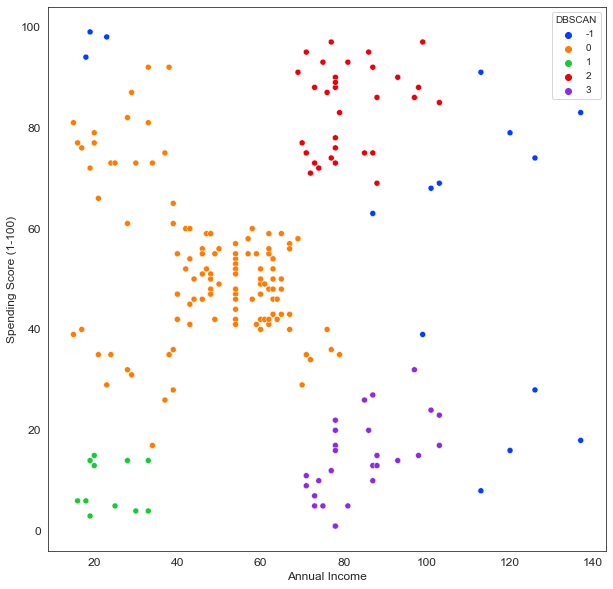

In [59]:
# DBScan
plt.figure(figsize = (10, 10))
# sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Annual Income', 
    y = 'Spending Score', 
    hue = 'DBSCAN',
    data = df,
    palette='bright')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)');

## **Summary**

Dalam kasus segmentasi customer dengan menggunakan 2 features, yaitu 'Age' dan 'Spending Score', didapat bahwa metode K-Means menghasilkan hasil clustering yang paling optimal, jika ditinjau pada silhouette score yang didapat. 

Silhouette score:
- Kmeans 5 clusters = 0.55
- Hierarchical (Ward) 5 clusters = 0.55
- DBSCAN 4 clusters = 0.41

In [60]:
df.head(3)

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,Ward5,Complete5,Average5,DBSCAN
0,19,15,39,4,0,1,0,0,0,0,4,1,1,0
1,21,15,81,3,0,1,0,0,0,0,3,3,3,0
2,20,16,6,4,0,1,0,0,0,0,4,1,1,1


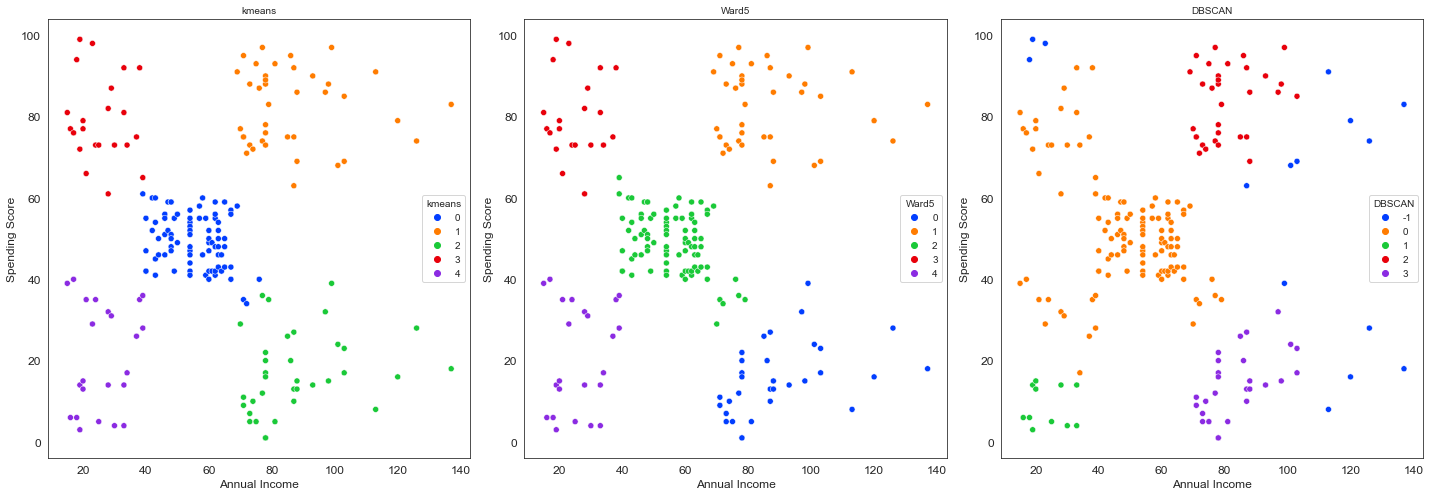

In [61]:
# Plotting the result
plt.figure(figsize = (20, 7))
# sns.set_context(context = 'notebook', font_scale=1.5)

list_model = ['kmeans', 'Ward5', 'DBSCAN']
plot_number = 1

for model in list_model:

    plt.subplot(1,3, plot_number)
    sns.scatterplot(
        x = 'Annual Income', 
        y = 'Spending Score', 
        hue = model,
        data = df,
        palette='bright')

    plt.title(model)

    plot_number += 1

plt.tight_layout()
plt.show()


Kita bisa ambil clustering Kmeans sebagai hasil terbaik.

Terbentuk 5 cluster:
1. Cluster 0: income sedang, spending sedang
2. Cluster 1: income rendah, spending tinggi 
3. Cluster 2: income rendah, spending rendah
4. Cluster 3: income tinggi, spending tinggi
5. Cluster 4: income tinggi, spending rendah